In [ ]:
import os

import cv2 as cv
from PIL import Image

import numpy as np
import pandas as pd

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root_path = "/content/drive/MyDrive/"

filenames_Beech = next(
    os.walk(f"{root_path}sw_data/train_test_sw/train_sw/Beech"), (None, None, [])
)[2]
filenames_Gardenia = next(
    os.walk(f"{root_path}sw_data/train_test_sw/train_sw/Gardenia"), (None, None, [])
)[2]
filenames_Lemon = next(
    os.walk(f"{root_path}sw_data/train_test_sw/train_sw/Lemon"), (None, None, [])
)[2]
filenames_Mean = next(
    os.walk(f"{root_path}sw_data/train_test_sw/train_sw/Mean"), (None, None, [])
)[2]
filenames_Tomato = next(
    os.walk(f"{root_path}sw_data/train_test_sw/train_sw/Tomato"), (None, None, [])
)[2]

len(filenames_Tomato)


618

In [ ]:
def modifyImage(filenames_name, class_name, root_path, save_root_path):
    for filenames in filenames_name:
        img = cv.imread(f"{root_path}/{class_name}/{filenames}")#/content/drive/MyDrive/Gardenia/sw_data/train_test_sw/train_sw/
        filenames = filenames.replace("frame", "frameModifed")
        laplacian = cv.Laplacian(img, cv.CV_64F)
        im = Image.fromarray((laplacian * 255).astype(np.uint8))
        im = im.convert("RGB", palette=Image.ADAPTIVE, colors=8)
        im.save(f"{save_root_path}/{class_name}/{filenames}")


In [ ]:
save_dir = f"{root_path}sw_data/train_test_sw/train_sw"
read_dir = f"{root_path}sw_data/train_test_sw"

modifyImage(filenames_Beech, "Beech", read_dir + "train_sw/", save_dir)
modifyImage(filenames_Gardenia, "Gardenia", read_dir + "train_sw/", save_dir)
modifyImage(filenames_Lemon, "Lemon", read_dir + "train_sw/", save_dir)
modifyImage(filenames_Mean, "Mean", read_dir + "train_sw/", save_dir)
modifyImage(filenames_Tomato, "Tomato", read_dir + "train_sw/", save_dir)


Beech1frame0000012.png
Beech1frameModifed0000012.png
Flower3frame0000012.png
Flower3frameModifed0000012.png
Lemon4frame0000012.png
Lemon4frameModifed0000012.png
Mean6frame0000012.png
Mean6frameModifed0000012.png
Tomato5frame0000012.png
Tomato5frameModifed0000012.png


In [ ]:
dir = f"{root_path}sw_data/train_test_sw/train_sw/"
print(os.listdir(dir))
# os.listdir(save_dir)


['Beech', 'Gardenia', 'Lemon', 'Mean', 'Tomato']


In [ ]:
test_labels_path = f"{root_path}sw_data/train_test_sw/test_labels.json"
test_labels = pd.read_json(test_labels_path)
test_labels["path"] = test_labels.filename.map(
    lambda filename: f"{root_path}sw_data/train_test_sw/test_sw/{filename}"
)
test_labels


filename   value  \
0     Beech1frame0000022.png   Beech   
1     Beech1frame0000026.png   Beech   
2     Beech1frame0000027.png   Beech   
3     Beech1frame0000044.png   Beech   
4     Beech1frame0000045.png   Beech   
..                       ...     ...   
254  Tomato5frame0000300.png  Tomato   
255  Tomato5frame0000309.png  Tomato   
256  Tomato5frame0000311.png  Tomato   
257  Tomato5frame0000313.png  Tomato   
258  Tomato5frame0000319.png  Tomato   

                                                  path  
0    /content/drive/MyDrive/sw_data/train_test_sw/t...  
1    /content/drive/MyDrive/sw_data/train_test_sw/t...  
2    /content/drive/MyDrive/sw_data/train_test_sw/t...  
3    /content/drive/MyDrive/sw_data/train_test_sw/t...  
4    /content/drive/MyDrive/sw_data/train_test_sw/t...  
..                                                 ...  
254  /content/drive/MyDrive/sw_data/train_test_sw/t...  
255  /content/drive/MyDrive/sw_data/train_test_sw/t...  
256  /content/drive/MyDrive/sw_data/train_test_sw/t...  
257  /content/drive/MyDrive/sw_data/train_test_sw/t...  
258  /content/drive/MyDrive/sw_data/train_test_sw/t...  

[259 rows x 3 columns]

In [ ]:
train_dirs = os.listdir(f"{root_path}sw_data/train_test_sw/train_sw")

train_labels = pd.DataFrame()

for d in train_dirs:
    for f in os.listdir(f"{root_path}sw_data/train_test_sw/train_sw/{d}"):
        df_dict = pd.DataFrame(
            [
                {
                    "filename": f,
                    "path": f"{root_path}sw_data/train_test_sw/train_sw/{d}/{f}",
                    "value": d,
                }
            ]
        )
        # print(df_dict)
        train_labels = pd.concat([train_labels, df_dict], ignore_index=True)

train_labels


filename  \
0                    Beech1frame0000067.png   
1                    Beech1frame0000073.png   
2                    Beech1frame0000219.png   
3                    Beech1frame0000126.png   
4                    Beech1frame0000144.png   
...                                     ...   
2870         Tomato5frameModifed0000273.png   
2871         Tomato5frameModifed0000312.png   
2872                Tomato5frame0000264.png   
2873                Tomato5frame0000031.png   
2874  Tomato5frameModifedModifed0000158.png   

                                                   path   value  
0     /content/drive/MyDrive/sw_data/train_test_sw/t...   Beech  
1     /content/drive/MyDrive/sw_data/train_test_sw/t...   Beech  
2     /content/drive/MyDrive/sw_data/train_test_sw/t...   Beech  
3     /content/drive/MyDrive/sw_data/train_test_sw/t...   Beech  
4     /content/drive/MyDrive/sw_data/train_test_sw/t...   Beech  
...                                                 ...     ...  
2870  /content/drive/MyDrive/sw_data/train_test_sw/t...  Tomato  
2871  /content/drive/MyDrive/sw_data/train_test_sw/t...  Tomato  
2872  /content/drive/MyDrive/sw_data/train_test_sw/t...  Tomato  
2873  /content/drive/MyDrive/sw_data/train_test_sw/t...  Tomato  
2874  /content/drive/MyDrive/sw_data/train_test_sw/t...  Tomato  

[2875 rows x 3 columns]

In [ ]:
# Define the model
class MLP(torch.nn.Module):
    def __init__(self, input_shape):
        # Initialize super class
        super().__init__()

        # Build model using Sequential container
        self.model = nn.Sequential(
            # Add input layer
            nn.Linear(input_shape, 512),
            # Add ReLU activation
            nn.ReLU(),
            # Add Another layer
            nn.Linear(512, 256),
            # Add ReLU activation
            nn.ReLU(),
            # Add Output layer
            nn.Linear(256, 5),
        )

    def forward(self, x):
        # Forward pass
        return self.model(x)


In [ ]:
def train():
    model.train()
    running_loss = 0
    running_correct = 0

    for x_train, y_train in tqdm(train_loader):

        x_train, y_train = x_train.to(device), y_train.to(device)
        
        # if not (i + 1) % 10:
        #     print(f"Step {i+1} completed")
        # Forward pass:
        # Flatten the image since the input to the network
        # x_train = transforms.ToTensor(x_train)
        x_train = x_train.view(x_train.shape[0], -1)
        # Compute predicted y by passing x to the model
        y = model(x_train)

        # Compute and print loss
        # print("there is a Y:", y)
        # print("There is a y_train:", y_train)
        loss = loss_function(y, y_train.clone().detach())
        running_loss += loss.item()

        # Compute Accuracy
        y_pred = y.argmax(dim=1)
        correct = torch.sum(y_pred == y_train)
        running_correct += correct

        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()

        # Calculate gradient using backward pass
        loss.backward()

        # Update model parameters (weights)
        optimizer.step()

    return running_loss / len(train_loader), running_correct.item() / len(
        train_loader.dataset
    )


In [ ]:
def val():
    model.eval()
    running_loss = 0
    running_correct = 0
    with torch.no_grad():
        for (x_val, y_val) in validation_loader:

            x_val, y_val = x_val.to(device), y_val.to(device)

            # Forward pass:
            # Flatten the image since the input to the network is a 784 dimensional vector
            x_val = x_val.view(x_val.shape[0], -1)

            # Compute raw score by passing x to the model
            y = model(x_val)

            # Score to probability using softmax
            prob = nn.functional.softmax(y, dim=1)

            # Compute Accuracy
            y_pred = prob.argmax(dim=1)

            correct = torch.sum(y_pred == y_val)
            running_correct += correct

            # Compute and print loss
            loss = loss_function(y, y_val)
            running_loss += loss.item()

    return running_loss / len(validation_loader), running_correct.item() / len(
        validation_loader.dataset
    )


In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, df, transform=None, target_transform=None):
        self.img_labels = df["value"]
        self.img_dir = df["path"]
        self.transform = transform
        self.target_transform = target_transform
        self.labels_dict = {label: i for i, label in enumerate(df["value"].unique())}

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = self.img_dir[idx]
        image = Image.open(img_path)
        label = self.img_labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image[:3], self.labels_dict[label]


In [ ]:
# Batch size : How many images are used to calculate the gradient
batch_size = 32

# Train DataLoader
train_dataset = CustomImageDataset(
    train_labels,
    transform=transforms.Compose(
        [
            transforms.Resize(64),
            # transforms.Normalize(),
            transforms.ToTensor(),
        ]
    ),
)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
# Validation DataLoader
validation_dataset = CustomImageDataset(
    test_labels,
    transform=transforms.Compose(
        [
            transforms.Resize(64),
            # transforms.Normalize(),
            transforms.ToTensor(),
        ]
    ),
)
validation_loader = DataLoader(
    dataset=validation_dataset, batch_size=batch_size, shuffle=False
)


In [ ]:
train_dataset[0][0], train_dataset[0][0].shape

(tensor([[[0.0392, 0.0510, 0.0510,  ..., 0.1137, 0.1216, 0.1098],
          [0.0431, 0.0471, 0.0471,  ..., 0.1020, 0.1176, 0.1098],
          [0.0471, 0.0510, 0.0549,  ..., 0.0980, 0.0980, 0.0941],
          ...,
          [0.0824, 0.0745, 0.0627,  ..., 0.0588, 0.0588, 0.0667],
          [0.0902, 0.0824, 0.0667,  ..., 0.0588, 0.0588, 0.0549],
          [0.0824, 0.0863, 0.0824,  ..., 0.0471, 0.0549, 0.0549]],
 
         [[0.0353, 0.0431, 0.0431,  ..., 0.1020, 0.1137, 0.1020],
          [0.0353, 0.0431, 0.0392,  ..., 0.0941, 0.1098, 0.1059],
          [0.0431, 0.0471, 0.0471,  ..., 0.0863, 0.0902, 0.0902],
          ...,
          [0.0745, 0.0667, 0.0588,  ..., 0.0549, 0.0510, 0.0588],
          [0.0824, 0.0745, 0.0510,  ..., 0.0510, 0.0510, 0.0510],
          [0.0745, 0.0745, 0.0667,  ..., 0.0431, 0.0510, 0.0510]],
 
         [[0.0275, 0.0353, 0.0314,  ..., 0.0784, 0.0863, 0.0784],
          [0.0275, 0.0314, 0.0275,  ..., 0.0745, 0.0824, 0.0784],
          [0.0314, 0.0353, 0.0353,  ...,

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
# Training parameters
num_epochs = 2000

# Construct model
model = MLP(np.prod(train_dataset[0][0].shape))

# CUDA init
model.to(device)

# Define loss function
loss_function = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=1e-3)

print(model)


MLP(
  (model): Sequential(
    (0): Linear(in_features=12288, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=5, bias=True)
  )
)


In [ ]:
# pip install tqdm
from tqdm.notebook import tqdm

In [ ]:
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

print("Starting Training...")
for ep in range(num_epochs):
    train_loss, train_acc = train()
    val_loss, val_acc = val()
    print(
        "Epoch: {}, Train Loss = {:.3f}, Train Acc = {:.3f} , Val Loss = {:.3f}, Val Acc = {:.3f}".format(
            ep + 1, train_loss, train_acc, val_loss, val_acc
        )
    )
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    train_acc_history.append(train_acc)
    val_acc_history.append(val_acc)


Starting Training...


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 1, Train Loss = 1.601, Train Acc = 0.224 , Val Loss = 1.609, Val Acc = 0.205


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 2, Train Loss = 1.596, Train Acc = 0.217 , Val Loss = 1.608, Val Acc = 0.208


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 3, Train Loss = 1.594, Train Acc = 0.218 , Val Loss = 1.607, Val Acc = 0.216


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 4, Train Loss = 1.592, Train Acc = 0.228 , Val Loss = 1.607, Val Acc = 0.212


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 5, Train Loss = 1.592, Train Acc = 0.214 , Val Loss = 1.606, Val Acc = 0.216


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 6, Train Loss = 1.591, Train Acc = 0.227 , Val Loss = 1.605, Val Acc = 0.224


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 7, Train Loss = 1.591, Train Acc = 0.233 , Val Loss = 1.605, Val Acc = 0.220


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 8, Train Loss = 1.590, Train Acc = 0.237 , Val Loss = 1.605, Val Acc = 0.220


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 9, Train Loss = 1.590, Train Acc = 0.233 , Val Loss = 1.604, Val Acc = 0.216


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 10, Train Loss = 1.590, Train Acc = 0.238 , Val Loss = 1.604, Val Acc = 0.220


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 11, Train Loss = 1.589, Train Acc = 0.235 , Val Loss = 1.604, Val Acc = 0.220


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 12, Train Loss = 1.589, Train Acc = 0.242 , Val Loss = 1.604, Val Acc = 0.220


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 13, Train Loss = 1.588, Train Acc = 0.243 , Val Loss = 1.604, Val Acc = 0.220


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 14, Train Loss = 1.588, Train Acc = 0.253 , Val Loss = 1.603, Val Acc = 0.224


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 15, Train Loss = 1.587, Train Acc = 0.252 , Val Loss = 1.602, Val Acc = 0.220


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 16, Train Loss = 1.587, Train Acc = 0.271 , Val Loss = 1.603, Val Acc = 0.216


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 17, Train Loss = 1.587, Train Acc = 0.252 , Val Loss = 1.603, Val Acc = 0.220


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 18, Train Loss = 1.586, Train Acc = 0.254 , Val Loss = 1.602, Val Acc = 0.220


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 19, Train Loss = 1.586, Train Acc = 0.257 , Val Loss = 1.602, Val Acc = 0.224


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 20, Train Loss = 1.586, Train Acc = 0.271 , Val Loss = 1.602, Val Acc = 0.224


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 21, Train Loss = 1.585, Train Acc = 0.267 , Val Loss = 1.601, Val Acc = 0.232


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 22, Train Loss = 1.585, Train Acc = 0.272 , Val Loss = 1.602, Val Acc = 0.236


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 23, Train Loss = 1.584, Train Acc = 0.266 , Val Loss = 1.601, Val Acc = 0.232


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 24, Train Loss = 1.584, Train Acc = 0.282 , Val Loss = 1.601, Val Acc = 0.232


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 25, Train Loss = 1.584, Train Acc = 0.269 , Val Loss = 1.601, Val Acc = 0.247


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 26, Train Loss = 1.583, Train Acc = 0.279 , Val Loss = 1.600, Val Acc = 0.239


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 27, Train Loss = 1.583, Train Acc = 0.286 , Val Loss = 1.600, Val Acc = 0.236


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 28, Train Loss = 1.582, Train Acc = 0.278 , Val Loss = 1.599, Val Acc = 0.239


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 29, Train Loss = 1.582, Train Acc = 0.279 , Val Loss = 1.600, Val Acc = 0.266


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 30, Train Loss = 1.582, Train Acc = 0.284 , Val Loss = 1.600, Val Acc = 0.259


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 31, Train Loss = 1.581, Train Acc = 0.297 , Val Loss = 1.600, Val Acc = 0.251


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 32, Train Loss = 1.581, Train Acc = 0.291 , Val Loss = 1.600, Val Acc = 0.255


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 33, Train Loss = 1.580, Train Acc = 0.288 , Val Loss = 1.599, Val Acc = 0.255


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 34, Train Loss = 1.580, Train Acc = 0.311 , Val Loss = 1.599, Val Acc = 0.251


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 35, Train Loss = 1.579, Train Acc = 0.294 , Val Loss = 1.598, Val Acc = 0.247


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 36, Train Loss = 1.579, Train Acc = 0.289 , Val Loss = 1.598, Val Acc = 0.266


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 37, Train Loss = 1.579, Train Acc = 0.313 , Val Loss = 1.598, Val Acc = 0.259


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 38, Train Loss = 1.578, Train Acc = 0.317 , Val Loss = 1.598, Val Acc = 0.251


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 39, Train Loss = 1.578, Train Acc = 0.315 , Val Loss = 1.598, Val Acc = 0.247


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 40, Train Loss = 1.577, Train Acc = 0.312 , Val Loss = 1.597, Val Acc = 0.263


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 41, Train Loss = 1.577, Train Acc = 0.295 , Val Loss = 1.597, Val Acc = 0.255


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 42, Train Loss = 1.576, Train Acc = 0.331 , Val Loss = 1.597, Val Acc = 0.263


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 43, Train Loss = 1.576, Train Acc = 0.318 , Val Loss = 1.597, Val Acc = 0.270


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 44, Train Loss = 1.575, Train Acc = 0.318 , Val Loss = 1.597, Val Acc = 0.263


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 45, Train Loss = 1.574, Train Acc = 0.321 , Val Loss = 1.597, Val Acc = 0.266


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 46, Train Loss = 1.575, Train Acc = 0.305 , Val Loss = 1.596, Val Acc = 0.263


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 47, Train Loss = 1.574, Train Acc = 0.323 , Val Loss = 1.595, Val Acc = 0.255


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 48, Train Loss = 1.573, Train Acc = 0.315 , Val Loss = 1.595, Val Acc = 0.259


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 49, Train Loss = 1.573, Train Acc = 0.318 , Val Loss = 1.596, Val Acc = 0.266


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 50, Train Loss = 1.572, Train Acc = 0.322 , Val Loss = 1.595, Val Acc = 0.282


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 51, Train Loss = 1.571, Train Acc = 0.343 , Val Loss = 1.596, Val Acc = 0.263


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 52, Train Loss = 1.571, Train Acc = 0.323 , Val Loss = 1.595, Val Acc = 0.259


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 53, Train Loss = 1.570, Train Acc = 0.339 , Val Loss = 1.595, Val Acc = 0.278


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 54, Train Loss = 1.570, Train Acc = 0.330 , Val Loss = 1.594, Val Acc = 0.278


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 55, Train Loss = 1.569, Train Acc = 0.331 , Val Loss = 1.594, Val Acc = 0.278


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 56, Train Loss = 1.569, Train Acc = 0.331 , Val Loss = 1.593, Val Acc = 0.263


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 57, Train Loss = 1.568, Train Acc = 0.340 , Val Loss = 1.593, Val Acc = 0.278


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 58, Train Loss = 1.568, Train Acc = 0.341 , Val Loss = 1.593, Val Acc = 0.270


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 59, Train Loss = 1.567, Train Acc = 0.343 , Val Loss = 1.592, Val Acc = 0.270


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 60, Train Loss = 1.566, Train Acc = 0.344 , Val Loss = 1.592, Val Acc = 0.263


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 61, Train Loss = 1.565, Train Acc = 0.342 , Val Loss = 1.592, Val Acc = 0.274


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 62, Train Loss = 1.564, Train Acc = 0.353 , Val Loss = 1.593, Val Acc = 0.286


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 63, Train Loss = 1.564, Train Acc = 0.345 , Val Loss = 1.591, Val Acc = 0.270


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 64, Train Loss = 1.563, Train Acc = 0.345 , Val Loss = 1.592, Val Acc = 0.247


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 65, Train Loss = 1.563, Train Acc = 0.334 , Val Loss = 1.591, Val Acc = 0.278


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 66, Train Loss = 1.562, Train Acc = 0.358 , Val Loss = 1.591, Val Acc = 0.270


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 67, Train Loss = 1.561, Train Acc = 0.359 , Val Loss = 1.591, Val Acc = 0.270


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 68, Train Loss = 1.561, Train Acc = 0.347 , Val Loss = 1.591, Val Acc = 0.266


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 69, Train Loss = 1.560, Train Acc = 0.341 , Val Loss = 1.590, Val Acc = 0.286


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 70, Train Loss = 1.559, Train Acc = 0.337 , Val Loss = 1.590, Val Acc = 0.290


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 71, Train Loss = 1.559, Train Acc = 0.353 , Val Loss = 1.589, Val Acc = 0.290


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 72, Train Loss = 1.558, Train Acc = 0.347 , Val Loss = 1.588, Val Acc = 0.282


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 73, Train Loss = 1.557, Train Acc = 0.361 , Val Loss = 1.590, Val Acc = 0.282


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 74, Train Loss = 1.556, Train Acc = 0.362 , Val Loss = 1.588, Val Acc = 0.286


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 75, Train Loss = 1.555, Train Acc = 0.346 , Val Loss = 1.589, Val Acc = 0.274


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 76, Train Loss = 1.554, Train Acc = 0.358 , Val Loss = 1.588, Val Acc = 0.282


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 77, Train Loss = 1.554, Train Acc = 0.355 , Val Loss = 1.588, Val Acc = 0.290


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 78, Train Loss = 1.553, Train Acc = 0.363 , Val Loss = 1.588, Val Acc = 0.278


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 79, Train Loss = 1.551, Train Acc = 0.355 , Val Loss = 1.587, Val Acc = 0.286


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 80, Train Loss = 1.551, Train Acc = 0.362 , Val Loss = 1.587, Val Acc = 0.286


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 81, Train Loss = 1.550, Train Acc = 0.357 , Val Loss = 1.586, Val Acc = 0.282


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 82, Train Loss = 1.549, Train Acc = 0.362 , Val Loss = 1.586, Val Acc = 0.282


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 83, Train Loss = 1.548, Train Acc = 0.341 , Val Loss = 1.588, Val Acc = 0.278


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 84, Train Loss = 1.547, Train Acc = 0.369 , Val Loss = 1.585, Val Acc = 0.290


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 85, Train Loss = 1.545, Train Acc = 0.341 , Val Loss = 1.587, Val Acc = 0.270


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 86, Train Loss = 1.545, Train Acc = 0.349 , Val Loss = 1.585, Val Acc = 0.293


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 87, Train Loss = 1.544, Train Acc = 0.357 , Val Loss = 1.584, Val Acc = 0.286


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 88, Train Loss = 1.543, Train Acc = 0.355 , Val Loss = 1.583, Val Acc = 0.297


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 89, Train Loss = 1.542, Train Acc = 0.355 , Val Loss = 1.584, Val Acc = 0.286


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 90, Train Loss = 1.540, Train Acc = 0.365 , Val Loss = 1.582, Val Acc = 0.297


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 91, Train Loss = 1.540, Train Acc = 0.350 , Val Loss = 1.583, Val Acc = 0.282


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 92, Train Loss = 1.538, Train Acc = 0.351 , Val Loss = 1.584, Val Acc = 0.286


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 93, Train Loss = 1.538, Train Acc = 0.367 , Val Loss = 1.581, Val Acc = 0.297


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 94, Train Loss = 1.536, Train Acc = 0.350 , Val Loss = 1.581, Val Acc = 0.290


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 95, Train Loss = 1.535, Train Acc = 0.361 , Val Loss = 1.580, Val Acc = 0.286


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 96, Train Loss = 1.534, Train Acc = 0.371 , Val Loss = 1.580, Val Acc = 0.293


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 97, Train Loss = 1.533, Train Acc = 0.363 , Val Loss = 1.580, Val Acc = 0.290


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 98, Train Loss = 1.531, Train Acc = 0.366 , Val Loss = 1.579, Val Acc = 0.309


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 99, Train Loss = 1.530, Train Acc = 0.360 , Val Loss = 1.579, Val Acc = 0.290


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 100, Train Loss = 1.529, Train Acc = 0.367 , Val Loss = 1.578, Val Acc = 0.297


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 101, Train Loss = 1.527, Train Acc = 0.375 , Val Loss = 1.577, Val Acc = 0.305


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 102, Train Loss = 1.526, Train Acc = 0.359 , Val Loss = 1.578, Val Acc = 0.290


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 103, Train Loss = 1.525, Train Acc = 0.358 , Val Loss = 1.578, Val Acc = 0.290


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 104, Train Loss = 1.523, Train Acc = 0.366 , Val Loss = 1.577, Val Acc = 0.274


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 105, Train Loss = 1.522, Train Acc = 0.365 , Val Loss = 1.577, Val Acc = 0.293


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 106, Train Loss = 1.520, Train Acc = 0.362 , Val Loss = 1.574, Val Acc = 0.301


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 107, Train Loss = 1.520, Train Acc = 0.359 , Val Loss = 1.575, Val Acc = 0.297


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 108, Train Loss = 1.518, Train Acc = 0.369 , Val Loss = 1.574, Val Acc = 0.297


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 109, Train Loss = 1.517, Train Acc = 0.365 , Val Loss = 1.574, Val Acc = 0.297


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 110, Train Loss = 1.515, Train Acc = 0.364 , Val Loss = 1.574, Val Acc = 0.293


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 111, Train Loss = 1.513, Train Acc = 0.365 , Val Loss = 1.573, Val Acc = 0.293


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 112, Train Loss = 1.512, Train Acc = 0.378 , Val Loss = 1.572, Val Acc = 0.301


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 113, Train Loss = 1.510, Train Acc = 0.375 , Val Loss = 1.572, Val Acc = 0.301


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 114, Train Loss = 1.508, Train Acc = 0.382 , Val Loss = 1.572, Val Acc = 0.293


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 115, Train Loss = 1.507, Train Acc = 0.379 , Val Loss = 1.570, Val Acc = 0.301


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 116, Train Loss = 1.506, Train Acc = 0.376 , Val Loss = 1.570, Val Acc = 0.301


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 117, Train Loss = 1.504, Train Acc = 0.378 , Val Loss = 1.570, Val Acc = 0.305


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 118, Train Loss = 1.503, Train Acc = 0.381 , Val Loss = 1.568, Val Acc = 0.301


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 119, Train Loss = 1.501, Train Acc = 0.378 , Val Loss = 1.566, Val Acc = 0.313


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 120, Train Loss = 1.499, Train Acc = 0.366 , Val Loss = 1.568, Val Acc = 0.297


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 121, Train Loss = 1.497, Train Acc = 0.384 , Val Loss = 1.565, Val Acc = 0.313


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 122, Train Loss = 1.496, Train Acc = 0.375 , Val Loss = 1.566, Val Acc = 0.317


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 123, Train Loss = 1.494, Train Acc = 0.376 , Val Loss = 1.564, Val Acc = 0.313


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 124, Train Loss = 1.492, Train Acc = 0.372 , Val Loss = 1.563, Val Acc = 0.324


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 125, Train Loss = 1.491, Train Acc = 0.379 , Val Loss = 1.562, Val Acc = 0.309


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 126, Train Loss = 1.488, Train Acc = 0.374 , Val Loss = 1.561, Val Acc = 0.320


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 127, Train Loss = 1.487, Train Acc = 0.380 , Val Loss = 1.562, Val Acc = 0.309


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 128, Train Loss = 1.485, Train Acc = 0.381 , Val Loss = 1.561, Val Acc = 0.313


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 129, Train Loss = 1.483, Train Acc = 0.384 , Val Loss = 1.559, Val Acc = 0.317


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 130, Train Loss = 1.482, Train Acc = 0.385 , Val Loss = 1.559, Val Acc = 0.309


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 131, Train Loss = 1.480, Train Acc = 0.384 , Val Loss = 1.558, Val Acc = 0.313


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 132, Train Loss = 1.477, Train Acc = 0.389 , Val Loss = 1.558, Val Acc = 0.309


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 133, Train Loss = 1.476, Train Acc = 0.390 , Val Loss = 1.557, Val Acc = 0.328


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 134, Train Loss = 1.474, Train Acc = 0.386 , Val Loss = 1.556, Val Acc = 0.313


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 135, Train Loss = 1.473, Train Acc = 0.380 , Val Loss = 1.555, Val Acc = 0.313


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 136, Train Loss = 1.470, Train Acc = 0.384 , Val Loss = 1.553, Val Acc = 0.313


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 137, Train Loss = 1.469, Train Acc = 0.384 , Val Loss = 1.551, Val Acc = 0.320


  0%|          | 0/90 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
# Define the model
class MMLP(torch.nn.Module):
    def __init__(self, input_shape):
        # Initialize super class
        super().__init__()

        # Build model using Sequential container
        self.model = nn.Sequential(
            # Add input layer
            nn.Linear(input_shape, 512),
            # Add ReLU activation
            nn.ReLU(),
            # Add Another layer
            nn.Linear(512, 256),
            # Add ReLU activation
            nn.ReLU(),
            # Add Another layer
            nn.Linear(256, 128),
            # Add ReLU activation
            nn.ReLU(),
            # Add Another layer
            nn.Linear(128, 64),
            # Add ReLU activation
            nn.ReLU(),
            # Add Another layer
            nn.Linear(64, 32),
            # Add ReLU activation
            nn.ReLU(),
            # Add Output layer
            nn.Linear(32, 5),
        )

    def forward(self, x):
        # Forward pass
        return self.model(x)


In [ ]:
# Training parameters
num_epochs = 100

# Construct model
model = MMLP(np.prod(train_dataset[0][0].shape))

# CUDA init
model.to(device)

# Define loss function
loss_function = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=1e-3)

print(model)


MMLP(
  (model): Sequential(
    (0): Linear(in_features=12288, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): ReLU()
    (10): Linear(in_features=32, out_features=5, bias=True)
  )
)


In [ ]:
big_train_loss_history = []
big_val_loss_history = []
big_train_acc_history = []
big_val_acc_history = []

print("Starting Training...")
for ep in range(num_epochs):
    train_loss, train_acc = train()
    val_loss, val_acc = val()
    print(
        "Epoch: {}, Train Loss = {:.3f}, Train Acc = {:.3f} , Val Loss = {:.3f}, Val Acc = {:.3f}".format(
            ep + 1, train_loss, train_acc, val_loss, val_acc
        )
    )
    big_train_loss_history.append(train_loss)
    big_val_loss_history.append(val_loss)
    big_train_acc_history.append(train_acc)
    big_val_acc_history.append(val_acc)

Starting Training...


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 1, Train Loss = 1.615, Train Acc = 0.212 , Val Loss = 1.640, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 2, Train Loss = 1.615, Train Acc = 0.212 , Val Loss = 1.640, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 3, Train Loss = 1.614, Train Acc = 0.212 , Val Loss = 1.639, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 4, Train Loss = 1.613, Train Acc = 0.212 , Val Loss = 1.638, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 5, Train Loss = 1.613, Train Acc = 0.212 , Val Loss = 1.637, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 6, Train Loss = 1.612, Train Acc = 0.212 , Val Loss = 1.636, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 7, Train Loss = 1.612, Train Acc = 0.212 , Val Loss = 1.636, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 8, Train Loss = 1.611, Train Acc = 0.212 , Val Loss = 1.635, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 9, Train Loss = 1.611, Train Acc = 0.212 , Val Loss = 1.634, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 10, Train Loss = 1.610, Train Acc = 0.212 , Val Loss = 1.633, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 11, Train Loss = 1.610, Train Acc = 0.212 , Val Loss = 1.633, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 12, Train Loss = 1.609, Train Acc = 0.212 , Val Loss = 1.632, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 13, Train Loss = 1.609, Train Acc = 0.212 , Val Loss = 1.631, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 14, Train Loss = 1.608, Train Acc = 0.212 , Val Loss = 1.631, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 15, Train Loss = 1.608, Train Acc = 0.212 , Val Loss = 1.630, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 16, Train Loss = 1.607, Train Acc = 0.212 , Val Loss = 1.630, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 17, Train Loss = 1.607, Train Acc = 0.212 , Val Loss = 1.629, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 18, Train Loss = 1.607, Train Acc = 0.213 , Val Loss = 1.629, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 19, Train Loss = 1.606, Train Acc = 0.226 , Val Loss = 1.628, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 20, Train Loss = 1.606, Train Acc = 0.236 , Val Loss = 1.628, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 21, Train Loss = 1.606, Train Acc = 0.226 , Val Loss = 1.627, Val Acc = 0.185


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 22, Train Loss = 1.605, Train Acc = 0.224 , Val Loss = 1.627, Val Acc = 0.174


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 23, Train Loss = 1.605, Train Acc = 0.229 , Val Loss = 1.626, Val Acc = 0.178


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 24, Train Loss = 1.605, Train Acc = 0.226 , Val Loss = 1.626, Val Acc = 0.178


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 25, Train Loss = 1.605, Train Acc = 0.224 , Val Loss = 1.625, Val Acc = 0.178


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 26, Train Loss = 1.604, Train Acc = 0.217 , Val Loss = 1.625, Val Acc = 0.181


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 27, Train Loss = 1.604, Train Acc = 0.213 , Val Loss = 1.625, Val Acc = 0.178


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 28, Train Loss = 1.604, Train Acc = 0.211 , Val Loss = 1.624, Val Acc = 0.166


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 29, Train Loss = 1.604, Train Acc = 0.205 , Val Loss = 1.624, Val Acc = 0.166


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 30, Train Loss = 1.603, Train Acc = 0.211 , Val Loss = 1.624, Val Acc = 0.193


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 31, Train Loss = 1.603, Train Acc = 0.216 , Val Loss = 1.623, Val Acc = 0.205


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 32, Train Loss = 1.603, Train Acc = 0.215 , Val Loss = 1.623, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 33, Train Loss = 1.603, Train Acc = 0.215 , Val Loss = 1.623, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 34, Train Loss = 1.603, Train Acc = 0.215 , Val Loss = 1.622, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 35, Train Loss = 1.602, Train Acc = 0.215 , Val Loss = 1.622, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 36, Train Loss = 1.602, Train Acc = 0.215 , Val Loss = 1.622, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 37, Train Loss = 1.602, Train Acc = 0.215 , Val Loss = 1.621, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 38, Train Loss = 1.602, Train Acc = 0.215 , Val Loss = 1.621, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 39, Train Loss = 1.602, Train Acc = 0.215 , Val Loss = 1.621, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 40, Train Loss = 1.602, Train Acc = 0.215 , Val Loss = 1.621, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 41, Train Loss = 1.602, Train Acc = 0.215 , Val Loss = 1.620, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 42, Train Loss = 1.601, Train Acc = 0.215 , Val Loss = 1.620, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 43, Train Loss = 1.601, Train Acc = 0.215 , Val Loss = 1.620, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 44, Train Loss = 1.601, Train Acc = 0.215 , Val Loss = 1.620, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 45, Train Loss = 1.601, Train Acc = 0.215 , Val Loss = 1.619, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 46, Train Loss = 1.601, Train Acc = 0.215 , Val Loss = 1.619, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 47, Train Loss = 1.601, Train Acc = 0.215 , Val Loss = 1.619, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 48, Train Loss = 1.601, Train Acc = 0.215 , Val Loss = 1.619, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 49, Train Loss = 1.600, Train Acc = 0.215 , Val Loss = 1.619, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 50, Train Loss = 1.600, Train Acc = 0.215 , Val Loss = 1.618, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 51, Train Loss = 1.600, Train Acc = 0.215 , Val Loss = 1.618, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 52, Train Loss = 1.600, Train Acc = 0.215 , Val Loss = 1.618, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 53, Train Loss = 1.600, Train Acc = 0.215 , Val Loss = 1.618, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 54, Train Loss = 1.600, Train Acc = 0.215 , Val Loss = 1.618, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 55, Train Loss = 1.600, Train Acc = 0.215 , Val Loss = 1.618, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 56, Train Loss = 1.600, Train Acc = 0.215 , Val Loss = 1.617, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 57, Train Loss = 1.600, Train Acc = 0.215 , Val Loss = 1.617, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 58, Train Loss = 1.600, Train Acc = 0.215 , Val Loss = 1.617, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 59, Train Loss = 1.600, Train Acc = 0.215 , Val Loss = 1.617, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 60, Train Loss = 1.599, Train Acc = 0.215 , Val Loss = 1.617, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 61, Train Loss = 1.599, Train Acc = 0.215 , Val Loss = 1.617, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 62, Train Loss = 1.599, Train Acc = 0.215 , Val Loss = 1.617, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 63, Train Loss = 1.599, Train Acc = 0.215 , Val Loss = 1.617, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 64, Train Loss = 1.599, Train Acc = 0.215 , Val Loss = 1.616, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 65, Train Loss = 1.599, Train Acc = 0.215 , Val Loss = 1.616, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 66, Train Loss = 1.599, Train Acc = 0.215 , Val Loss = 1.616, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 67, Train Loss = 1.599, Train Acc = 0.215 , Val Loss = 1.616, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 68, Train Loss = 1.599, Train Acc = 0.215 , Val Loss = 1.616, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 69, Train Loss = 1.599, Train Acc = 0.215 , Val Loss = 1.616, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 70, Train Loss = 1.599, Train Acc = 0.215 , Val Loss = 1.616, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 71, Train Loss = 1.599, Train Acc = 0.216 , Val Loss = 1.616, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 72, Train Loss = 1.599, Train Acc = 0.218 , Val Loss = 1.616, Val Acc = 0.205


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 73, Train Loss = 1.599, Train Acc = 0.218 , Val Loss = 1.616, Val Acc = 0.212


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 74, Train Loss = 1.599, Train Acc = 0.220 , Val Loss = 1.616, Val Acc = 0.224


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 75, Train Loss = 1.599, Train Acc = 0.218 , Val Loss = 1.615, Val Acc = 0.220


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 76, Train Loss = 1.599, Train Acc = 0.217 , Val Loss = 1.615, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 77, Train Loss = 1.599, Train Acc = 0.217 , Val Loss = 1.615, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 78, Train Loss = 1.599, Train Acc = 0.214 , Val Loss = 1.615, Val Acc = 0.212


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 79, Train Loss = 1.599, Train Acc = 0.215 , Val Loss = 1.615, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 80, Train Loss = 1.598, Train Acc = 0.216 , Val Loss = 1.615, Val Acc = 0.189


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 81, Train Loss = 1.598, Train Acc = 0.213 , Val Loss = 1.615, Val Acc = 0.189


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 82, Train Loss = 1.598, Train Acc = 0.216 , Val Loss = 1.615, Val Acc = 0.197


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 83, Train Loss = 1.598, Train Acc = 0.217 , Val Loss = 1.615, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 84, Train Loss = 1.598, Train Acc = 0.216 , Val Loss = 1.615, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 85, Train Loss = 1.598, Train Acc = 0.215 , Val Loss = 1.615, Val Acc = 0.193


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 86, Train Loss = 1.598, Train Acc = 0.215 , Val Loss = 1.615, Val Acc = 0.193


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 87, Train Loss = 1.598, Train Acc = 0.217 , Val Loss = 1.615, Val Acc = 0.181


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 88, Train Loss = 1.598, Train Acc = 0.218 , Val Loss = 1.615, Val Acc = 0.181


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 89, Train Loss = 1.598, Train Acc = 0.215 , Val Loss = 1.615, Val Acc = 0.181


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 90, Train Loss = 1.598, Train Acc = 0.214 , Val Loss = 1.615, Val Acc = 0.181


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 91, Train Loss = 1.598, Train Acc = 0.214 , Val Loss = 1.615, Val Acc = 0.181


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 92, Train Loss = 1.598, Train Acc = 0.215 , Val Loss = 1.615, Val Acc = 0.181


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 93, Train Loss = 1.598, Train Acc = 0.214 , Val Loss = 1.614, Val Acc = 0.181


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 94, Train Loss = 1.598, Train Acc = 0.214 , Val Loss = 1.614, Val Acc = 0.181


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 95, Train Loss = 1.598, Train Acc = 0.214 , Val Loss = 1.614, Val Acc = 0.185


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 96, Train Loss = 1.598, Train Acc = 0.214 , Val Loss = 1.614, Val Acc = 0.189


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 97, Train Loss = 1.598, Train Acc = 0.215 , Val Loss = 1.614, Val Acc = 0.189


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 98, Train Loss = 1.598, Train Acc = 0.215 , Val Loss = 1.614, Val Acc = 0.189


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 99, Train Loss = 1.598, Train Acc = 0.214 , Val Loss = 1.614, Val Acc = 0.189


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 100, Train Loss = 1.598, Train Acc = 0.214 , Val Loss = 1.614, Val Acc = 0.189


In [ ]:
# Define the model
class SupaMLP(torch.nn.Module):
    def __init__(self, input_shape):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(input_shape, 512),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512,512),
            nn.Dropout(),
            nn.Linear(512,10),
            nn.Dropout()
        )
        
    def forward(self,x):
        return self.model(x)


In [ ]:
# Training parameters
num_epochs = 100

# Construct model
model = SupaMLP(np.prod(train_dataset[0][0].shape))

# CUDA init
model.to(device)

# Define loss function
loss_function = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=1e-3)

print(model)


SupaMLP(
  (model): Sequential(
    (0): Linear(in_features=12288, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): Dropout(p=0.5, inplace=False)
    (5): Linear(in_features=512, out_features=10, bias=True)
    (6): Dropout(p=0.5, inplace=False)
  )
)


In [ ]:
supa_train_loss_history = []
supa_val_loss_history = []
supa_train_acc_history = []
supa_val_acc_history = []

print("Starting Training...")
for ep in range(num_epochs):
    train_loss, train_acc = train()
    val_loss, val_acc = val()
    print(
        "Epoch: {}, Train Loss = {:.3f}, Train Acc = {:.3f} , Val Loss = {:.3f}, Val Acc = {:.3f}".format(
            ep + 1, train_loss, train_acc, val_loss, val_acc
        )
    )
    supa_train_loss_history.append(train_loss)
    supa_val_loss_history.append(val_loss)
    supa_train_acc_history.append(train_acc)
    supa_val_acc_history.append(val_acc)

Starting Training...


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 1, Train Loss = 2.172, Train Acc = 0.194 , Val Loss = 2.204, Val Acc = 0.224


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 2, Train Loss = 2.114, Train Acc = 0.199 , Val Loss = 2.177, Val Acc = 0.205


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 3, Train Loss = 2.081, Train Acc = 0.219 , Val Loss = 2.152, Val Acc = 0.216


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 4, Train Loss = 2.069, Train Acc = 0.220 , Val Loss = 2.136, Val Acc = 0.224


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 5, Train Loss = 2.063, Train Acc = 0.218 , Val Loss = 2.121, Val Acc = 0.236


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 6, Train Loss = 2.059, Train Acc = 0.216 , Val Loss = 2.114, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 7, Train Loss = 2.061, Train Acc = 0.213 , Val Loss = 2.110, Val Acc = 0.201


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 8, Train Loss = 2.062, Train Acc = 0.202 , Val Loss = 2.103, Val Acc = 0.228


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 9, Train Loss = 2.037, Train Acc = 0.218 , Val Loss = 2.090, Val Acc = 0.208


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 10, Train Loss = 2.043, Train Acc = 0.218 , Val Loss = 2.087, Val Acc = 0.208


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 11, Train Loss = 2.053, Train Acc = 0.206 , Val Loss = 2.080, Val Acc = 0.220


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 12, Train Loss = 2.042, Train Acc = 0.214 , Val Loss = 2.074, Val Acc = 0.232


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 13, Train Loss = 2.037, Train Acc = 0.227 , Val Loss = 2.067, Val Acc = 0.220


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 14, Train Loss = 2.028, Train Acc = 0.218 , Val Loss = 2.059, Val Acc = 0.236


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 15, Train Loss = 2.032, Train Acc = 0.212 , Val Loss = 2.050, Val Acc = 0.236


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 16, Train Loss = 2.010, Train Acc = 0.226 , Val Loss = 2.043, Val Acc = 0.236


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 17, Train Loss = 2.018, Train Acc = 0.221 , Val Loss = 2.034, Val Acc = 0.239


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 18, Train Loss = 2.006, Train Acc = 0.226 , Val Loss = 2.029, Val Acc = 0.212


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 19, Train Loss = 2.024, Train Acc = 0.221 , Val Loss = 2.027, Val Acc = 0.232


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 20, Train Loss = 2.006, Train Acc = 0.233 , Val Loss = 2.017, Val Acc = 0.236


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 21, Train Loss = 2.008, Train Acc = 0.236 , Val Loss = 2.020, Val Acc = 0.232


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 22, Train Loss = 2.021, Train Acc = 0.206 , Val Loss = 2.020, Val Acc = 0.251


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 23, Train Loss = 2.004, Train Acc = 0.219 , Val Loss = 2.012, Val Acc = 0.251


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 24, Train Loss = 1.999, Train Acc = 0.227 , Val Loss = 2.001, Val Acc = 0.263


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 25, Train Loss = 2.005, Train Acc = 0.221 , Val Loss = 2.001, Val Acc = 0.232


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 26, Train Loss = 2.016, Train Acc = 0.208 , Val Loss = 2.002, Val Acc = 0.243


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 27, Train Loss = 2.006, Train Acc = 0.213 , Val Loss = 1.997, Val Acc = 0.236


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 28, Train Loss = 2.003, Train Acc = 0.217 , Val Loss = 1.991, Val Acc = 0.236


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 29, Train Loss = 2.002, Train Acc = 0.211 , Val Loss = 1.990, Val Acc = 0.270


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 30, Train Loss = 1.994, Train Acc = 0.226 , Val Loss = 1.979, Val Acc = 0.259


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 31, Train Loss = 1.994, Train Acc = 0.231 , Val Loss = 1.979, Val Acc = 0.278


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 32, Train Loss = 1.985, Train Acc = 0.239 , Val Loss = 1.970, Val Acc = 0.263


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 33, Train Loss = 1.992, Train Acc = 0.232 , Val Loss = 1.971, Val Acc = 0.282


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 34, Train Loss = 1.994, Train Acc = 0.234 , Val Loss = 1.963, Val Acc = 0.263


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 35, Train Loss = 1.998, Train Acc = 0.224 , Val Loss = 1.963, Val Acc = 0.270


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 36, Train Loss = 1.986, Train Acc = 0.231 , Val Loss = 1.957, Val Acc = 0.263


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 37, Train Loss = 1.991, Train Acc = 0.232 , Val Loss = 1.957, Val Acc = 0.259


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 38, Train Loss = 1.978, Train Acc = 0.231 , Val Loss = 1.948, Val Acc = 0.293


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 39, Train Loss = 1.979, Train Acc = 0.229 , Val Loss = 1.947, Val Acc = 0.274


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 40, Train Loss = 1.982, Train Acc = 0.232 , Val Loss = 1.946, Val Acc = 0.278


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 41, Train Loss = 1.976, Train Acc = 0.231 , Val Loss = 1.941, Val Acc = 0.274


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 42, Train Loss = 1.985, Train Acc = 0.237 , Val Loss = 1.938, Val Acc = 0.286


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 43, Train Loss = 1.985, Train Acc = 0.233 , Val Loss = 1.935, Val Acc = 0.324


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 44, Train Loss = 1.974, Train Acc = 0.245 , Val Loss = 1.928, Val Acc = 0.293


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 45, Train Loss = 1.981, Train Acc = 0.227 , Val Loss = 1.928, Val Acc = 0.301


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 46, Train Loss = 1.984, Train Acc = 0.217 , Val Loss = 1.927, Val Acc = 0.286


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 47, Train Loss = 1.982, Train Acc = 0.223 , Val Loss = 1.926, Val Acc = 0.297


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 48, Train Loss = 1.978, Train Acc = 0.242 , Val Loss = 1.924, Val Acc = 0.301


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 49, Train Loss = 1.953, Train Acc = 0.256 , Val Loss = 1.913, Val Acc = 0.305


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 50, Train Loss = 1.979, Train Acc = 0.235 , Val Loss = 1.917, Val Acc = 0.313


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 51, Train Loss = 1.977, Train Acc = 0.231 , Val Loss = 1.916, Val Acc = 0.313


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 52, Train Loss = 1.961, Train Acc = 0.242 , Val Loss = 1.908, Val Acc = 0.309


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 53, Train Loss = 1.973, Train Acc = 0.232 , Val Loss = 1.912, Val Acc = 0.328


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 54, Train Loss = 1.948, Train Acc = 0.249 , Val Loss = 1.901, Val Acc = 0.290


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 55, Train Loss = 1.962, Train Acc = 0.244 , Val Loss = 1.903, Val Acc = 0.309


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 56, Train Loss = 1.971, Train Acc = 0.227 , Val Loss = 1.903, Val Acc = 0.301


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 57, Train Loss = 1.966, Train Acc = 0.231 , Val Loss = 1.896, Val Acc = 0.293


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 58, Train Loss = 1.957, Train Acc = 0.243 , Val Loss = 1.894, Val Acc = 0.320


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 59, Train Loss = 1.958, Train Acc = 0.243 , Val Loss = 1.893, Val Acc = 0.297


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 60, Train Loss = 1.955, Train Acc = 0.244 , Val Loss = 1.887, Val Acc = 0.320


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 61, Train Loss = 1.944, Train Acc = 0.252 , Val Loss = 1.878, Val Acc = 0.305


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 62, Train Loss = 1.949, Train Acc = 0.238 , Val Loss = 1.883, Val Acc = 0.320


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 63, Train Loss = 1.959, Train Acc = 0.246 , Val Loss = 1.882, Val Acc = 0.301


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 64, Train Loss = 1.957, Train Acc = 0.237 , Val Loss = 1.879, Val Acc = 0.317


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 65, Train Loss = 1.957, Train Acc = 0.255 , Val Loss = 1.878, Val Acc = 0.305


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 66, Train Loss = 1.963, Train Acc = 0.239 , Val Loss = 1.880, Val Acc = 0.313


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 67, Train Loss = 1.947, Train Acc = 0.251 , Val Loss = 1.871, Val Acc = 0.313


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 68, Train Loss = 1.942, Train Acc = 0.252 , Val Loss = 1.868, Val Acc = 0.313


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 69, Train Loss = 1.960, Train Acc = 0.234 , Val Loss = 1.868, Val Acc = 0.309


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 70, Train Loss = 1.951, Train Acc = 0.253 , Val Loss = 1.868, Val Acc = 0.297


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 71, Train Loss = 1.949, Train Acc = 0.243 , Val Loss = 1.863, Val Acc = 0.313


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 72, Train Loss = 1.950, Train Acc = 0.238 , Val Loss = 1.865, Val Acc = 0.301


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 73, Train Loss = 1.940, Train Acc = 0.243 , Val Loss = 1.857, Val Acc = 0.317


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 74, Train Loss = 1.948, Train Acc = 0.242 , Val Loss = 1.856, Val Acc = 0.309


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 75, Train Loss = 1.944, Train Acc = 0.249 , Val Loss = 1.855, Val Acc = 0.324


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 76, Train Loss = 1.933, Train Acc = 0.268 , Val Loss = 1.846, Val Acc = 0.309


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 77, Train Loss = 1.946, Train Acc = 0.255 , Val Loss = 1.850, Val Acc = 0.313


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 78, Train Loss = 1.939, Train Acc = 0.248 , Val Loss = 1.846, Val Acc = 0.301


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 79, Train Loss = 1.944, Train Acc = 0.253 , Val Loss = 1.847, Val Acc = 0.290


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 80, Train Loss = 1.940, Train Acc = 0.261 , Val Loss = 1.842, Val Acc = 0.313


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 81, Train Loss = 1.937, Train Acc = 0.247 , Val Loss = 1.838, Val Acc = 0.317


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 82, Train Loss = 1.935, Train Acc = 0.259 , Val Loss = 1.841, Val Acc = 0.313


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 83, Train Loss = 1.947, Train Acc = 0.249 , Val Loss = 1.842, Val Acc = 0.320


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 84, Train Loss = 1.944, Train Acc = 0.255 , Val Loss = 1.837, Val Acc = 0.313


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 85, Train Loss = 1.943, Train Acc = 0.253 , Val Loss = 1.836, Val Acc = 0.290


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 86, Train Loss = 1.935, Train Acc = 0.241 , Val Loss = 1.831, Val Acc = 0.290


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 87, Train Loss = 1.923, Train Acc = 0.266 , Val Loss = 1.830, Val Acc = 0.301


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 88, Train Loss = 1.936, Train Acc = 0.254 , Val Loss = 1.827, Val Acc = 0.293


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 89, Train Loss = 1.928, Train Acc = 0.253 , Val Loss = 1.826, Val Acc = 0.301


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 90, Train Loss = 1.936, Train Acc = 0.242 , Val Loss = 1.825, Val Acc = 0.301


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 91, Train Loss = 1.918, Train Acc = 0.275 , Val Loss = 1.819, Val Acc = 0.301


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 92, Train Loss = 1.929, Train Acc = 0.257 , Val Loss = 1.819, Val Acc = 0.320


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 93, Train Loss = 1.930, Train Acc = 0.259 , Val Loss = 1.821, Val Acc = 0.324


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 94, Train Loss = 1.918, Train Acc = 0.264 , Val Loss = 1.820, Val Acc = 0.297


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 95, Train Loss = 1.943, Train Acc = 0.251 , Val Loss = 1.828, Val Acc = 0.320


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 96, Train Loss = 1.929, Train Acc = 0.250 , Val Loss = 1.819, Val Acc = 0.297


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 97, Train Loss = 1.927, Train Acc = 0.257 , Val Loss = 1.813, Val Acc = 0.317


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 98, Train Loss = 1.924, Train Acc = 0.261 , Val Loss = 1.811, Val Acc = 0.309


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 99, Train Loss = 1.911, Train Acc = 0.267 , Val Loss = 1.808, Val Acc = 0.309


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch: 100, Train Loss = 1.912, Train Acc = 0.273 , Val Loss = 1.803, Val Acc = 0.320


Text(0.5, 1.0, 'Loss function comparision')

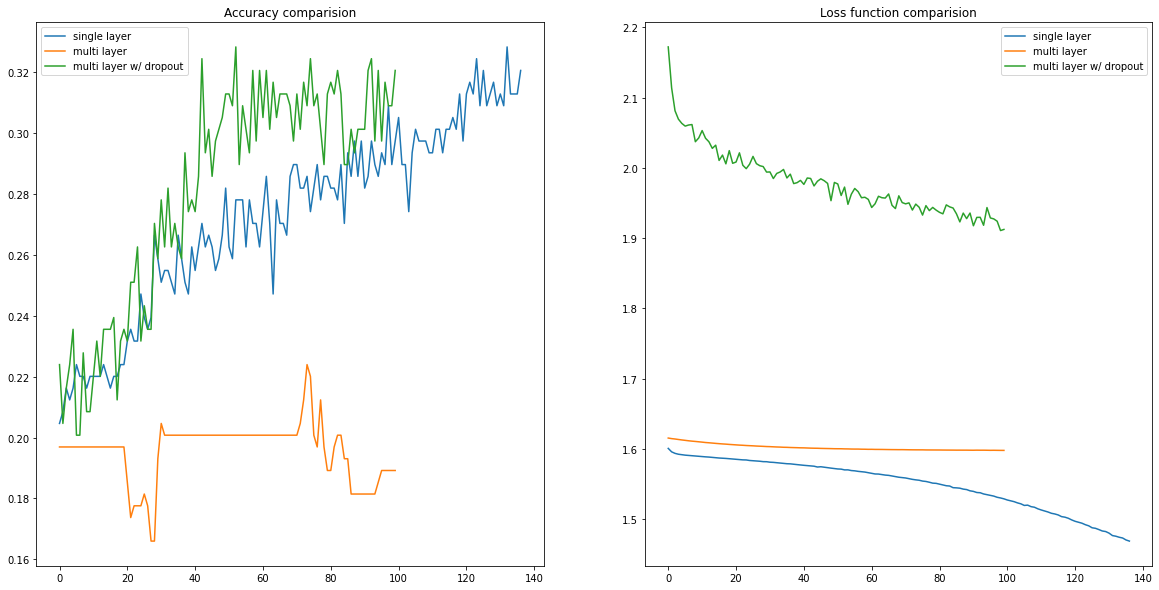

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize = (20,10))

x1 = val_acc_history
x2 = big_val_acc_history
x3 = supa_val_acc_history

ax[0].plot(range(len(x1)), x1, label = 'single layer')
ax[0].plot(range(len(x2)), x2, label = 'multi layer')
ax[0].plot(range(len(x3)), x3, label = 'multi layer w/ dropout')

ax[0].legend()

ax[0].set_title("Accuracy comparision")


l1 = train_loss_history
l2 = big_train_loss_history
l3 = supa_train_loss_history

ax[1].plot(range(len(l1)), l1, label = 'single layer')
ax[1].plot(range(len(l2)), l2, label = 'multi layer')
ax[1].plot(range(len(l3)), l3, label = 'multi layer w/ dropout')

ax[1].legend()

ax[1].set_title("Loss function comparision")